# NLP Emails:

## Business Objective:

- Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying, racism, sexual favourtism and hate in the gender or culture, in today’s world so dominated by email no organization is immune to these hate emails.
-The goal of the project is to identify such emails in the given day based on the above inappropriate content.
Data Set Details:
-The dataset contains around 20 lakh emails generated by employees of an organization.
-Data set details sent in csv file. 

### 1.1 Import Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from wordcloud import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

### 1.2 Read The Dataset

In [2]:
df = pd.read_csv("emails")
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [3]:
df.shape

(48076, 5)

+ we have data contain total 48076 rows and 2 columns

### 1.3  Feature Engineering / Data Cleaning

In [4]:
df.drop(["Unnamed: 0","filename",'Message-ID'],axis = 1, inplace = True)
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


+ Drop repeated / unwanted columns from given dataset

### 2. Auto EDA

In [5]:
# # 1. Using Pandas Profiling
# import pandas_profiling as pp
# EDA_report=pp.ProfileReport(etext)
# EDA_report.to_notebook_iframe()
# EDA_report.to_file(output_file='Emails_PP_Report.html')

In [6]:
# !pip install sweetviz

In [7]:
# # 2. Using Sweetviz
# import sweetviz as sv
# sweet_report=sv.analyze(etext)
# sweet_report.show_notebook()
# sweet_report.show_html('Emails_SV_Report.html')

### 2. EDA
to get understanding of data

In [8]:
df.rename({'content': 'text', 'Class': 'target'}, axis = 1, inplace = True)

+ rename columns content as text and class as target

In [9]:
df.index

RangeIndex(start=0, stop=48076, step=1)

In [10]:
df.dtypes

text      object
target    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    48076 non-null  object
 1   target  48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB


+ Data is ojective type and no null values.

In [12]:
df.isna().sum()

text      0
target    0
dtype: int64

+ again cross checked and found there is no null values in data i.e. given dataset is completely filled.

In [13]:
df.target.value_counts()

Non Abusive    44666
Abusive         3410
Name: target, dtype: int64

In [14]:
df.groupby("target").describe()

text                                                            \
             count unique                                                top   
target                                                                         
Abusive       3410   1642  \n\n -----Original Message-----\nFrom: \tCusto...   
Non Abusive  44666  23014  Ken Lay and Jeff Skilling were interviewed on ...   

                  
            freq  
target            
Abusive       11  
Non Abusive   19

+ Here we conclude unique values for each target variable is different from count means data contains duplicate values.

In [15]:
df[df.duplicated()]

,text,target
7,sorry i've taken so long...just been trying to...,Abusive
8,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
9,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive
10,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
11,Do you know my hr rep's name?\n\n\n\nJennifer ...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


+ Checked duplicate values.

In [16]:
df.duplicated().sum()

23420

+ found 23420 duplicates in my data.

In [17]:
df.drop_duplicates(inplace=True)

+ dropping duplicates from the data for better accuracy.

In [18]:
df[df.duplicated()]

,text,target


+ No Duplicate values in my data.

In [19]:
df.head()

,text,target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [20]:
df.reset_index(drop=True)

,text,target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
24651,Do you need new leads for your business ?\n D...,Non Abusive
24652,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
24653,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
24654,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#label encoding done for output variable whee we can divide them in classes
df['target']=encoder.fit_transform(df['target'])

+ We have convert  categorical variable into numerical variable using Label Encoder.

### Distribution of target variable for prediction

In [22]:
df.target.value_counts()

1    23014
0     1642
Name: target, dtype: int64

+ total 23014 are Non Abusive and 1642 are Abusive variables.

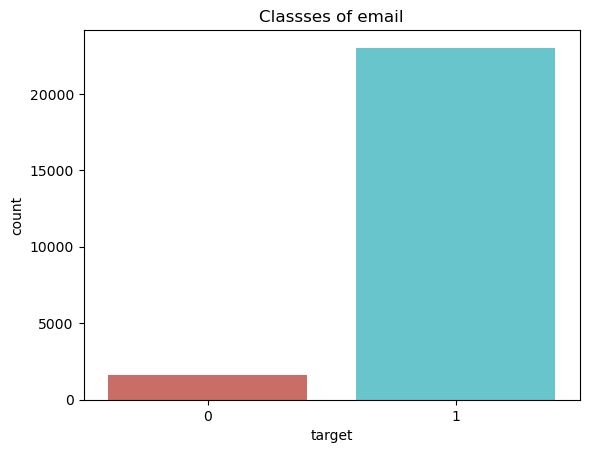

In [23]:
sns.countplot(x=df['target'], palette='hls')
plt.title("Classses of email")
plt.show()

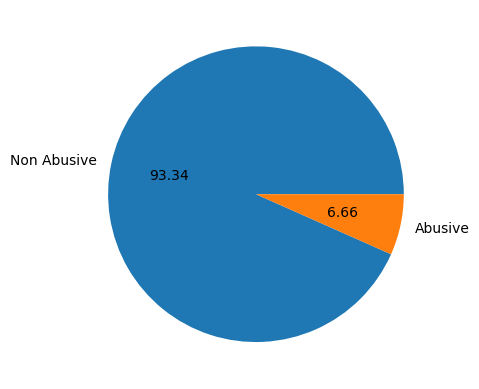

In [24]:
plt.pie(df['target'].value_counts(), labels=['Non Abusive','Abusive'], autopct = '%0.2f')
plt.show()

+ from above plots we can see that the data is imbalanced.

In [25]:
import nltk
# nlp library to perform NLP operations like tokenisation, stemming, TFiDF etc.

In [26]:
df['num_char']= df['text'].apply(len)
df.head()

,text,target,num_char
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [27]:
df['words_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,text,target,num_char,words_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [28]:
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,target,num_char,words_count,sentence_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [29]:
df[['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.321017,12.479031
std,5394.644531,818.334355,26.660055
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [30]:
# for ham messages we can see difference in mean btw Abusive and Non Abusive messages
df[df['target']==0][['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.696102,16.905603
std,2834.633786,590.600439,32.147667
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [31]:
df[df['target']==1][['num_char','words_count','sentence_count']].describe()

,num_char,words_count,sentence_count
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.151560,12.163205
std,5532.160062,832.213721,26.196939
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32337.000000,1084.000000


+ mean of both Abusive and Non Abusive shows that Abusive and Non Abusive messages have around 4 sentences on an avg.

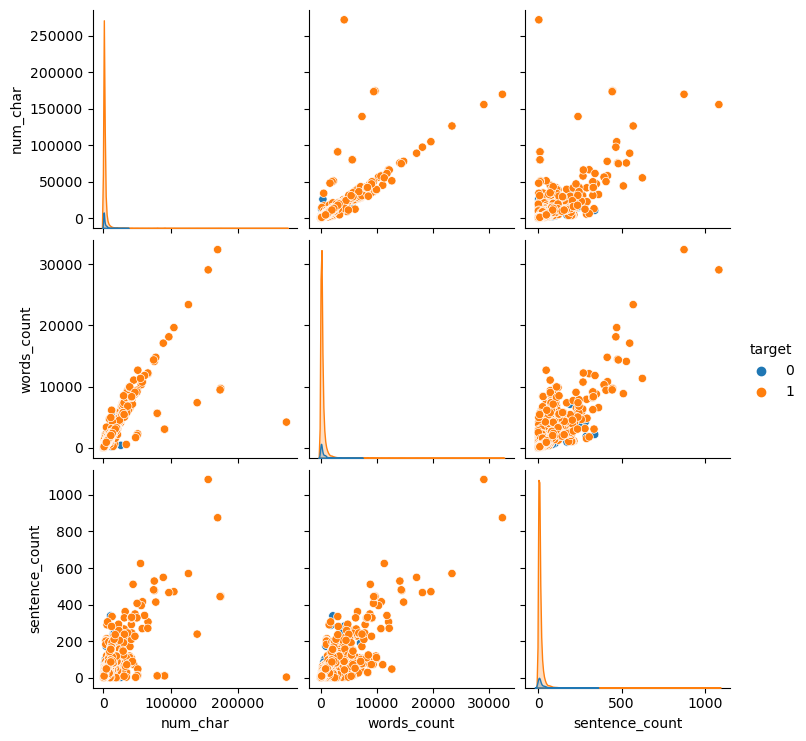

In [32]:
# to check outliers and to visualize the relationship in one plot.
sns.pairplot(df,hue='target')
plt.show()

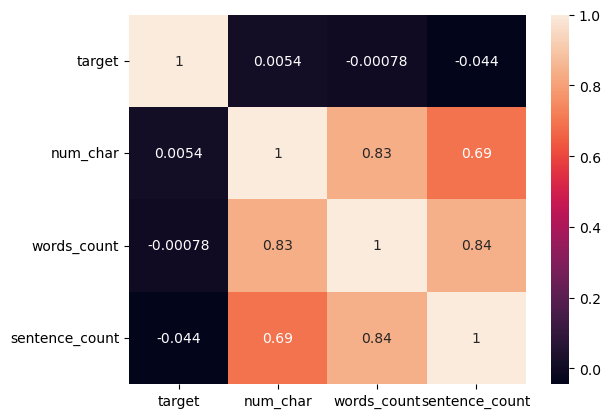

In [33]:
sns.heatmap(df.corr(),annot=True) 
plt.show()

+ we can see a high correlation btw length & words_count = 0.83 and length & sentence_count = 0.69 so we will use only one of them in model building.

### 3.Data Preprocessing
+ Lower case
+ Tokenisation
+ Removing special characters
+ Removing stop words and punctuation
+ Stemming or Lemmatization

In [34]:
from nltk.corpus import stopwords
# stopwords.words('english') 
# used for sentence formation not having any meaning
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [35]:
len(df)

24656

In [36]:
# making function to perform all steps 
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum(): # to remove non alpha numeric characters in our text
            y.append(i)
    text=y[:] # copy like this otherwise it will affect text also 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

,text,target,num_char,words_count,sentence_count,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


+ from now on we will use tranformed_text column

In [40]:
# using wordcloud module to see what words are repeating in Abusive messages
from wordcloud import WordCloud
wc=WordCloud(width=2000,height=1200,min_font_size=10,background_color='black')

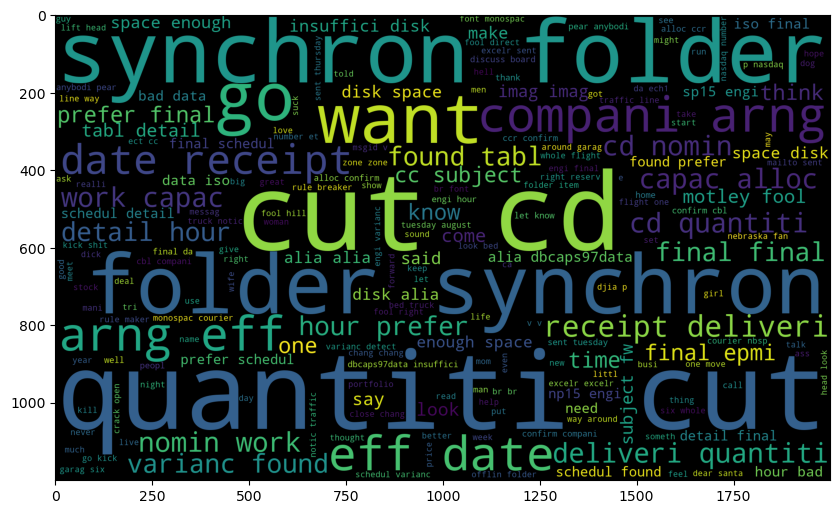

In [41]:
abusive_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(abusive_wc)

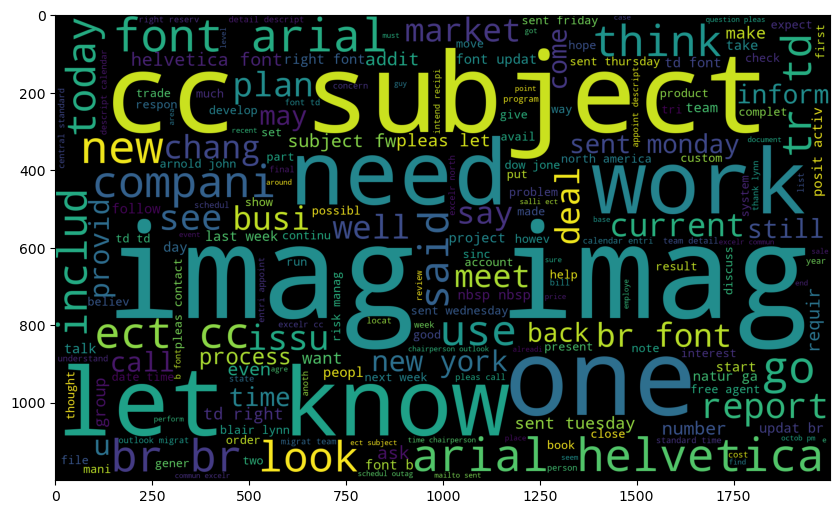

In [42]:
Non_abusive_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(Non_abusive_wc)

In [43]:
# top 30 spam words
abusive_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        abusive_corpus.append(word)

In [44]:
# abusive_corpus
# now we have abusive words 
# but we need top 30 spam words so using counter from collection library
from collections import Counter
count_abusive=pd.DataFrame(Counter(abusive_corpus).most_common(30))
count_abusive.head()

,0,1
0,excelr,32931
1,http,25600
2,ect,18547
3,subject,17615
4,pleas,16877


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='0'>

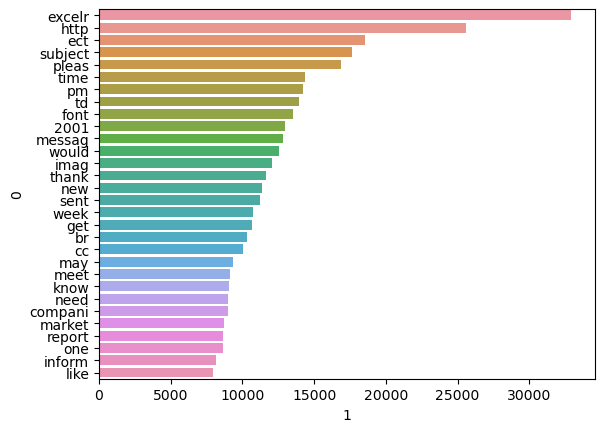

In [45]:
# showing in a bar plot for better comparision
sns.barplot(count_abusive[1],count_abusive[0])

+ Note: These all plotting and words counts helps in data interpretation which is very important for understanding how model will work on any input we will provide

# Data Balancing